clase 2 en los puntos de equilibrio los denominadores estan al reves

F(x,y)=(F1,F2)=(x`,y`)

Hay que evaluar la matriz jacobiana en el 0 0 y esa matriz es dF1/dx dF1/dy | dF2/dx dF2/dy

calculamos autovalores de la matriz evaluada en los puntos de equilibrio (si la parte real es negativa es estable)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

In [ ]:
population = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Modelado/population.csv")

In [ ]:
alpha = 0.25
beta = 1
gamma = 0.01
delta = 0.01

x0 = 80
y0 = 30

In [ ]:
def derivadas(X, t, alpha, beta, gamma, delta):
  x, y = X
  dotx = x * (-alpha + gamma * y)
  doty = y * (beta - delta * x)
  return np.array([ dotx , doty])

In [ ]:
Nt = 1000
tmax = 20
t = np.linspace(0,tmax,Nt)
X0 = [x0,y0]
res = integrate.odeint(derivadas, X0, t, args =(alpha, beta, gamma, delta))
x,y = res.T

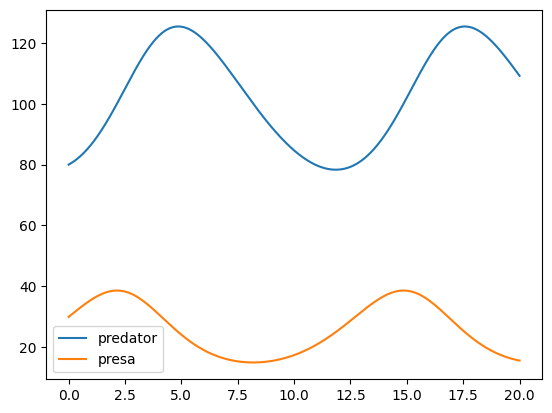

In [ ]:
plt.plot(t,x,label="predator")
plt.plot(t,y,label = "presa")
plt.legend()

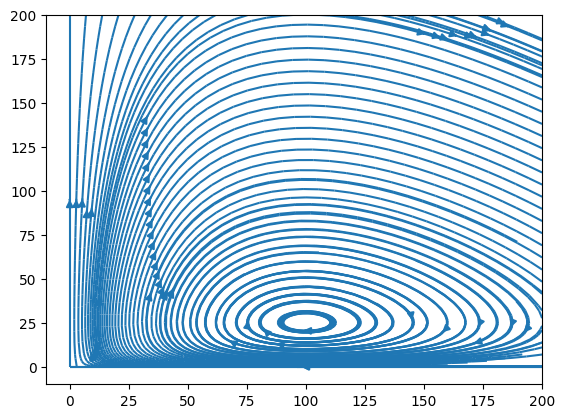

In [ ]:
w_1 = 0
w_2 = 200
Y, X = np.mgrid[w_1:w_2:100j , w_1:w_2:100j] #elijo limites
U = X * (-alpha + gamma * Y)
V = Y * (beta - delta * X)

plt.streamplot(X,Y,U,V,density = [1,1], broken_streamlines = False)  #density me da cuantas orbitas quiero
#plt.plot([1], [1], marker = "o", markersize = 6, linestyle = " ", color = "red")
#plt.title("Varying Density)
plt.show()
# cada curva esta asociada a una condicion inicial de cantidad de presas y predadores y el movimiento de la curva es el tiempo
# Y es presa

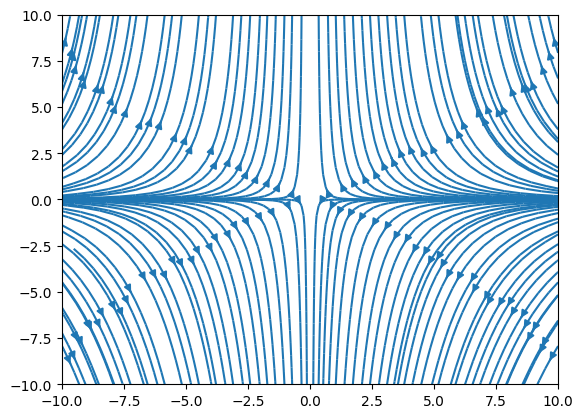

In [ ]:
w_1 = -10
w_2 = 10
Y, X = np.mgrid[w_1:w_2:100j , w_1:w_2:100j] #elijo limites
U = X * (-alpha + gamma * Y)
V = Y * (beta - delta * X)

plt.streamplot(X,Y,U,V,density = [1,1], broken_streamlines = False)  #density me da cuantas orbitas quiero
#plt.plot([1], [1], marker = "o", markersize = 6, linestyle = " ", color = "red")
#plt.title("Varying Density)
plt.show()

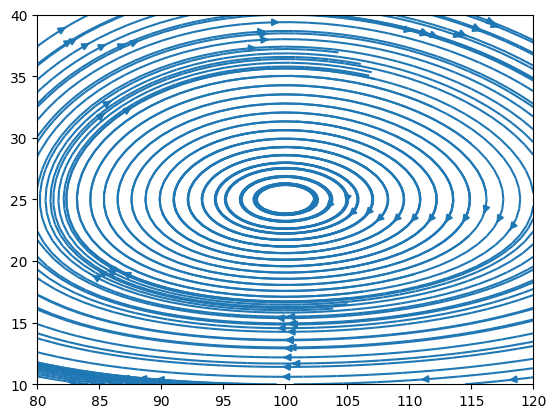

In [ ]:
w_1 = -10
w_2 = 10
Y, X = np.mgrid[10:40:100j , 80:120:100j] #elijo limites
U = X * (-alpha + gamma * Y)
V = Y * (beta - delta * X)

plt.streamplot(X,Y,U,V,density = [1,1], broken_streamlines = False)  #density me da cuantas orbitas quiero
#plt.plot([1], [1], marker = "o", markersize = 6, linestyle = " ", color = "red")
#plt.title("Varying Density)
plt.show()

El modelo SIR es uno de los modelos epidemiológicos más simples capaces de capturar muchas de las características típicas de los brotes epidémicos. El nombre del modelo proviene de las iniciales S (población susceptible), I (población infectada) y R (población recuperada). El modelo relaciona las variaciones de las tres poblaciones (Susceptible, Infectada y Recuperada) a través de la tasa de infección y el período infeccioso promedio.

Los diagrmas de fase estan dados por el det(A-lam I) = lam^2 - tr(a)*lam + det(a)

det(a)<0 silla

det(a)>0 y tr(a)^2 >= 4 * det(a) mismo signo: atraen si tr(a) < 0 y repelen si tr(A)>0

tr(A) != 0 y tr(a)^2 < 4*det(a) autovalores complejos: atraen si tr(a) < 0 y repelen si tr(A)>0

tr(A)=0 y det<0 son imaginarios puros

asumo que no nace ni muere gente S + I + R = N

dS/dt = - B SI/N

dI/dt = B S*I / N - gamma* I (o sea I*(B*S/N - gamma) )

dR/dt = gamma * I


en la seguda si B/N * S0 - gamma > 0 pasa que S0>gamma * N / B
significa que va a haber epidemia si eso pasa y si no no



dS/dR = -B*(S/N) / gamma
S = S0 * e ** (-B*R/gamma*N)  >= S0* e ** (-B*N/gamma*R)
los susceptibles son mayores a algo positivo

Si S>gamma *N/B


In [ ]:
beta = 0.2
gamma =0.1
N = 10000
s0 = 9999
i0= 1
r0= N - s0 - i0

In [ ]:
def derivadas2(X, t, n, beta, gamma):
  s, i, r = X
  dots = - (beta*s*i)/n
  doti = beta*s*i/n - gamma*i
  dotr = gamma * i
  return np.array([ dots , doti, dotr])

In [ ]:
Nt = 1000
tmax = 200
t = np.linspace(0,tmax,Nt)
X0 = [s0,i0,r0]
res = integrate.odeint(derivadas2, X0, t, args =(N,beta, gamma))
s,i,r= res.T

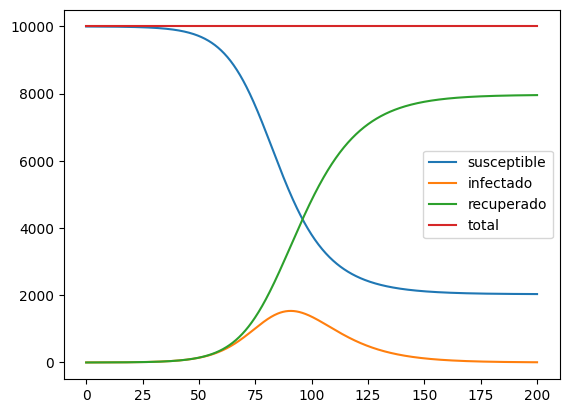

In [ ]:
plt.plot(t,s,label="susceptible")
plt.plot(t,i,label = "infectado")
plt.plot(t,r,label = "recuperado")
plt.plot(t,s+i+r,label = "total")
plt.legend()

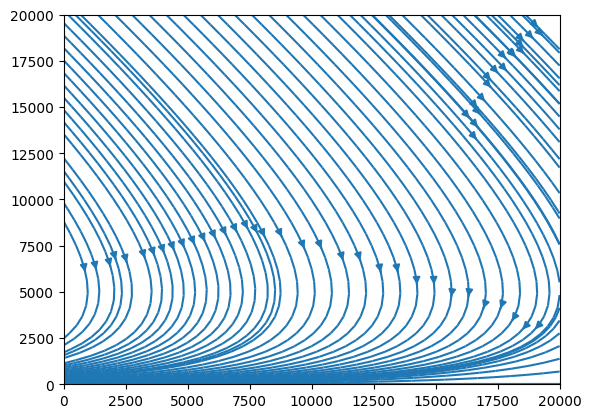

In [ ]:
#los susceptibles se van a infectar (crece) pero despues recuperar (decrece)
w_1 = 0
w_2 = 20000
S, I= np.mgrid[w_1:w_2:100j , w_1:w_2:100j] #elijo limites S, I: S es mi eje Y, I es X
dots = - (beta*S*I)/N
doti = beta*S*I/N - gamma*I

plt.streamplot(I,S,doti,dots,density = [1,1], broken_streamlines = False)  #density me da cuantas orbitas quiero
#plt.plot([1], [1], marker = "o", markersize = 6, linestyle = " ", color = "red")
#plt.title("Varying Density)
plt.show()
# cada curva esta asociada a una condicion inicial de Susceptibles e infectados
# S es eje Y

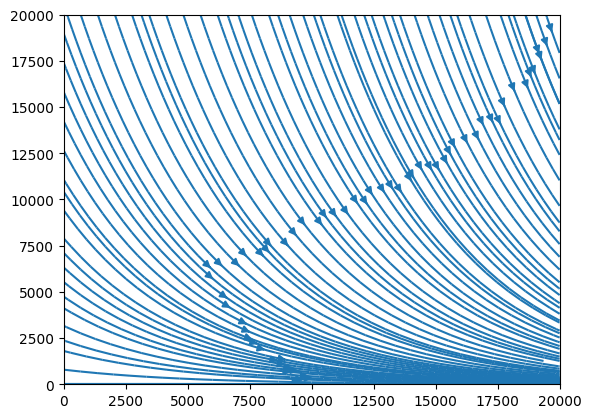

In [ ]:
# los susceptibles se van a infectar (no sabemos) entonces se van a recuperar (va a aumentar recuperados)
w_1 = 0
w_2 = 20000
dots = - (beta*S*I)/N
dotr = gamma * I
S, R = np.mgrid[w_1:w_2:100j , w_1:w_2:100j]
plt.streamplot(R,S,dotr,dots,density = [1,1], broken_streamlines = False)  #density me da cuantas orbitas quiero
#plt.plot([1], [1], marker = "o", markersize = 6, linestyle = " ", color = "red")
#plt.title("Varying Density)
plt.show()
# cada curva esta asociada a una condicion inicial de Susceptibles e infectados
# S es eje Y

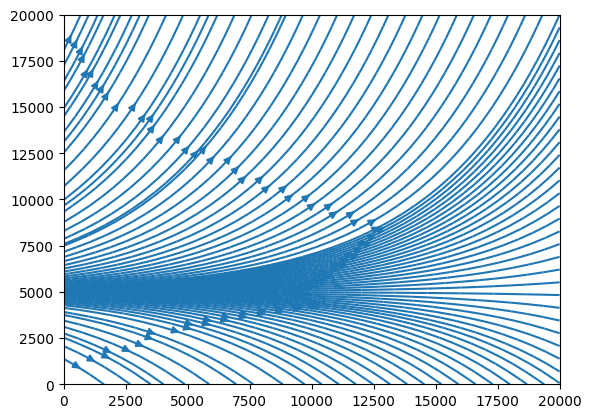

In [ ]:
w_1 = 0
w_2 = 20000
I1, R= np.mgrid[w_1:w_2:100j , w_1:w_2:100j]
dotr = gamma * I1
doti = beta*S*I1/N - gamma*I1

plt.streamplot(R,I1,dotr,doti,density = [1,1], broken_streamlines = False)  #density me da cuantas orbitas quiero
#plt.plot([1], [1], marker = "o", markersize = 6, linestyle = " ", color = "red")
#plt.title("Varying Density)
plt.show()
# cada curva esta asociada a una condicion inicial de Susceptibles e infectados
# S es eje Y

dN/dt = r * N(t) * [1 - N(t-2)/k]

In [ ]:
pip install jitcode

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 19.9 MB/s eta 0:00:00
  Created wheel for jitcode: filename=jitcode-1.7.2-py3-none-any.whl size=18932 sha256=356169ebbef853ba72eee7d0b3b9e41259a53f9d0659cebb4d1bae2834c2d4d1
  Stored in directory: /root/.cache/pip/wheels/ab/1a/74/f1f12aee09e0ef1c60096524ac3ac4c44eb9866162e607b4b4
  Created wheel for jitcxde_common: filename=jitcxde_common-1.5.4-py3-none-any.whl size=16756 sha256=b6c7c5cbefcda92a78d33fb3666d3c410c25bcbcd7adeb2a48733bf3db091278
  Stored in directory: /root/.cache/pip/wheels/92/23/cb/8709d3774a8f11f2b7d14b976be040a5180c9917a90ba3e9ba
Successfully built jitcode jitcxde_common


In [ ]:
pip install